Bibilothèques

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Fonctions

In [12]:
def amortissement_par_km(prix_avion, duree_amortissement, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return prix_avion / (duree_amortissement * nbr_heures_vol_annuel * vitesse_croisiere_avion)

def salaires_PNT_par_km(salaire_PNT_horaire, nbr_PNT, vitesse_croisiere_avion):
    return nbr_PNT * salaire_PNT_horaire / vitesse_croisiere_avion

def assurance_par_km(prix_assurance_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return prix_assurance_annuel / (nbr_heures_vol_annuel * vitesse_croisiere_avion)

def redevance_de_stationnement_par_km(redevance_de_stationnement_horaire, vitesse_croisiere_avion):
    return redevance_de_stationnement_horaire / vitesse_croisiere_avion

def actifs_aeroports_par_km(prix_actifs_aeroports_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return prix_actifs_aeroports_annuel / (nbr_heures_vol_annuel * vitesse_croisiere_avion)

def couts_administratif_par_km(couts_administratif_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return couts_administratif_annuel / (nbr_heures_vol_annuel * vitesse_croisiere_avion)

def cout_energie_thermique_par_km (consommation_energie_thermique,cout_energie_thermique) :
    return consommation_energie_thermique*cout_energie_thermique   #L/km * €/L

def cout_energie_electrique_par_km (consommation_energie_electrique,cout_energie_electrique) :
    return consommation_energie_electrique*cout_energie_electrique  #kWh/km * €/kWh

def maintenance_par_km(maintenance_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return maintenance_annuel / (nbr_heures_vol_annuel * vitesse_croisiere_avion)

def taxes_redevances_aeroportuaires_par_km(taxes_redevances_aeroportuaires_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return taxes_redevances_aeroportuaires_annuel / (nbr_heures_vol_annuel * vitesse_croisiere_avion)

def cout_turnaround_par_km(cout_turnaround_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion):
    return cout_turnaround_annuel / (nbr_heures_vol_annuel * vitesse_croisiere_avion)

def estimer_couts_fixes_par_km(amortissement_avion_par_km, salaires_PNT_par_km, assurances_par_km, redevance_de_stationnement_par_km, actifs_aeroports_par_km, cout_administratif_par_km):
    return amortissement_avion_par_km + salaires_PNT_par_km + assurances_par_km + redevance_de_stationnement_par_km + actifs_aeroports_par_km + cout_administratif_par_km

def estimer_couts_variables_par_km(cout_energie_par_km, maintenance_par_km, taxes_redevances_aeroportuaires_par_km, cout_turnaround_par_km):
    return cout_energie_par_km + maintenance_par_km + taxes_redevances_aeroportuaires_par_km + cout_turnaround_par_km

def calculer_catk(cout_fixe_par_km, cout_variable_par_km, distance, capacite_tonnes_fret):
    cout_total_vol_par_km = cout_fixe_par_km + cout_variable_par_km
    return cout_total_vol_par_km / capacite_tonnes_fret

def calculer_ratk(prix_tonne_fret, distance, taux_remplissage):
    revenus_total = prix_tonne_fret*taux_remplissage
    return revenus_total / distance

def calculer_rentabilite(distance, amortissement_avion_par_km, salaires_PNT_par_km, assurances_par_km, redevance_de_stationnement_par_km, actifs_aeroports_par_km, cout_administratif_par_km, cout_energie_par_km, maintenance_par_km, taxes_redevances_aeroportuaires_par_km, cout_turnaround_par_km, prix_tonne_fret, capacite_tonnes_fret, taux_remplissage):
    cout_fixe_par_km = estimer_couts_fixes_par_km(amortissement_avion_par_km, salaires_PNT_par_km, assurances_par_km, redevance_de_stationnement_par_km, actifs_aeroports_par_km, cout_administratif_par_km)
    cout_variable_par_km = estimer_couts_variables_par_km(cout_energie_par_km, maintenance_par_km, taxes_redevances_aeroportuaires_par_km, cout_turnaround_par_km)
    catk = calculer_catk(cout_fixe_par_km, cout_variable_par_km, distance, capacite_tonnes_fret)
    ratk = calculer_ratk(prix_tonne_fret, distance, taux_remplissage)
    rentabilite = ratk - catk
    return catk, ratk, rentabilite

#### SCENARIO 1 : FRET ###

Entrer les paramètres

In [13]:
vitesse_croisiere_avion = 463 # km/h         
distance = vitesse_croisiere_avion * 1 # en km 
prix_avion = 12750000
duree_amortissement = 20
nbr_heures_vol_annuel = 1700
salaire_PNT_horaire = 59.5
nbr_PNT = 1
prix_assurance_annuel = 34000
redevance_de_stationnement_horaire = 40
prix_actifs_aeroports_annuel = 85000
couts_administratif_annuel = 85000
consommation_energie_thermique= 1.08     # en L/km 
cout_energie_thermique=    1.037      # en €/L
consommation_energie_electrique= 4.32      # en kWh/km   #Consommation d’energie×Cout de l’ electricite =4,32kWh/km×0,034€/kWh= 0,15€/km #facteur d'hybridation :10% (Puissance totale Moteur ERA : 2 MW)
cout_energie_electrique=   0.0289     # en €/kWh
maintenance_annuel = 340000
taxes_redevances_aeroportuaires_annuel = 85000
cout_turnaround_annuel = 175000


facteur_hybridation = 0.69
capacite_tonnes_fret= 1.9 # en tonnes (capacité)
prix_tonne_fret = 755 #€/tonne
taux_remplissage = 0.80


In [14]:
amortissement_avion_par_km = amortissement_par_km(prix_avion, duree_amortissement, nbr_heures_vol_annuel, vitesse_croisiere_avion)
salaires_PNT_par_km = salaires_PNT_par_km(salaire_PNT_horaire, nbr_PNT, vitesse_croisiere_avion)
assurances_par_km = assurance_par_km(prix_assurance_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion)
redevance_de_stationnement_par_km = redevance_de_stationnement_par_km(redevance_de_stationnement_horaire, vitesse_croisiere_avion)
actifs_aeroports_par_km = actifs_aeroports_par_km(prix_actifs_aeroports_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion)
cout_administratif_par_km = couts_administratif_par_km(couts_administratif_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion)
cout_energie_par_km = (1-facteur_hybridation)*cout_energie_thermique_par_km(consommation_energie_thermique, cout_energie_thermique) + facteur_hybridation*cout_energie_electrique_par_km (consommation_energie_electrique, cout_energie_electrique)
maintenance_par_km = maintenance_par_km(maintenance_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion)
taxes_redevances_aeroportuaires_par_km = taxes_redevances_aeroportuaires_par_km(taxes_redevances_aeroportuaires_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion)
cout_turnaround_par_km = cout_turnaround_par_km(cout_turnaround_annuel, nbr_heures_vol_annuel, vitesse_croisiere_avion)



catk, ratk, rentabilite = calculer_rentabilite(distance, amortissement_avion_par_km, salaires_PNT_par_km, assurances_par_km, redevance_de_stationnement_par_km, actifs_aeroports_par_km, cout_administratif_par_km, cout_energie_par_km, maintenance_par_km, taxes_redevances_aeroportuaires_par_km, cout_turnaround_par_km, prix_tonne_fret, capacite_tonnes_fret, taux_remplissage)

print(f"CATK: {catk:.2f} €/tonne.km, RATK: {ratk:.2f} €/tonne.km, Rentabilité: {rentabilite:.2f} €/tonne.km")

CATK: 1.31 €/tonne.km, RATK: 1.30 €/tonne.km, Rentabilité: -0.00 €/tonne.km


Tracer

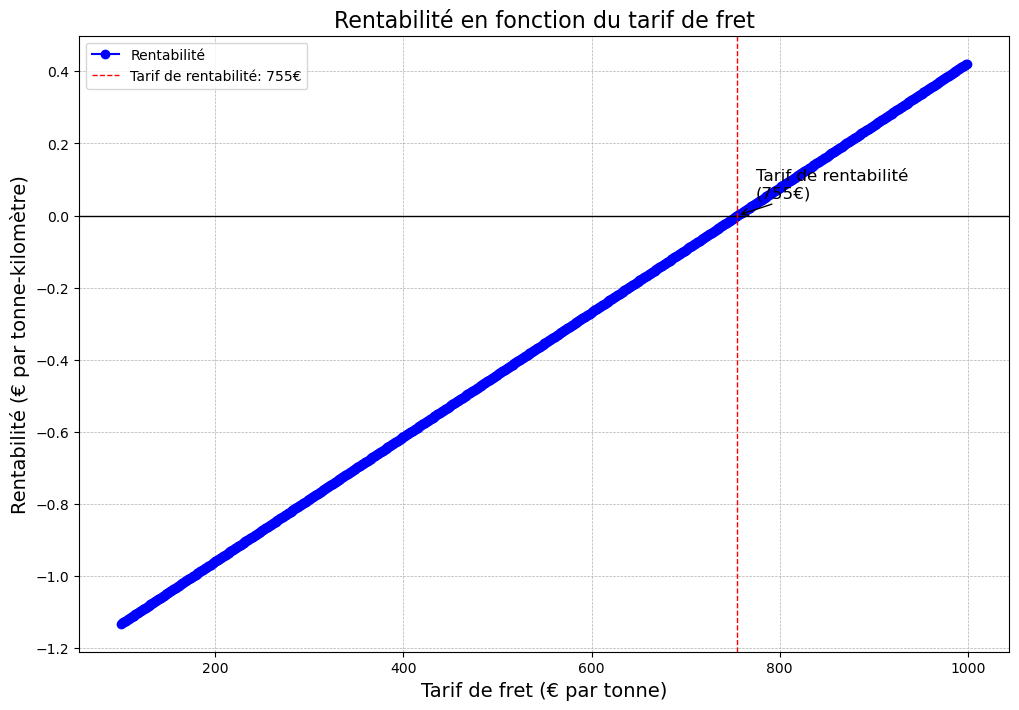

In [15]:
# Liste pour stocker les résultats
tarifs_fret = np.arange(100, 1000, 1)  # Variation du tarif de fret de 100€ à 1000€ par tonne
rentabilites = []

# Calcul de la rentabilité pour chaque tarif de fret
for prix_tonne_fret in tarifs_fret:
    catk, ratk, rentabilite = calculer_rentabilite(distance, amortissement_avion_par_km, salaires_PNT_par_km, assurances_par_km, redevance_de_stationnement_par_km, actifs_aeroports_par_km, cout_administratif_par_km, cout_energie_par_km, maintenance_par_km, taxes_redevances_aeroportuaires_par_km, cout_turnaround_par_km, prix_tonne_fret, capacite_tonnes_fret, taux_remplissage)
    rentabilites.append(rentabilite)

# Tracé de la courbe
plt.figure(figsize=(12, 8))
plt.plot(tarifs_fret, rentabilites, marker='o', linestyle='-', color='b', label='Rentabilité')
plt.title('Rentabilité en fonction du tarif de fret', fontsize=16)
plt.xlabel('Tarif de fret (€ par tonne)', fontsize=14)
plt.ylabel('Rentabilité (€ par tonne-kilomètre)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.legend()

# Trouver le tarif de fret pour lequel la rentabilité est nulle
tarif_rentable = None
for i in range(len(rentabilites) - 1):
    if rentabilites[i] <= 0 <= rentabilites[i + 1]:
        tarif_rentable = tarifs_fret[i]
        break

# Ajouter une ligne verticale pour le seuil de rentabilité
if tarif_rentable is not None:
    plt.axvline(tarif_rentable, color='red', linestyle='--', linewidth=1, label=f'Tarif de rentabilité: {tarif_rentable}€')
    plt.annotate(f'Tarif de rentabilité\n({tarif_rentable}€)', 
                 xy=(tarif_rentable, 0), 
                 xytext=(tarif_rentable + 20, 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=12)

plt.legend()
plt.show()

Répartition des coûts 

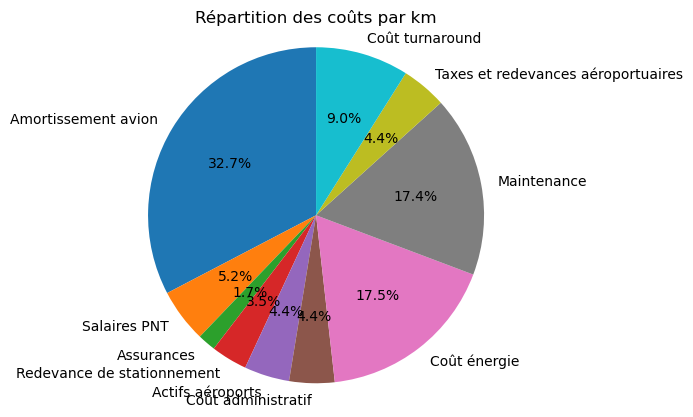

In [17]:
import matplotlib.pyplot as plt

# Données
labels = [
    'Amortissement avion', 
    'Salaires PNT', 
    'Assurances', 
    'Redevance de stationnement', 
    'Actifs aéroports', 
    'Coût administratif', 
    'Coût énergie', 
    'Maintenance', 
    'Taxes et redevances aéroportuaires', 
    'Coût turnaround'
]
costs_per_km = [
    
    amortissement_avion_par_km,
    salaires_PNT_par_km,
    assurances_par_km,
    redevance_de_stationnement_par_km,
    actifs_aeroports_par_km,
    cout_administratif_par_km,
    cout_energie_par_km,
    maintenance_par_km,
    taxes_redevances_aeroportuaires_par_km,
    cout_turnaround_par_km

]

# Graphique en camembert
fig, ax = plt.subplots()
ax.pie(costs_per_km, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Pour que le camembert soit circulaire

# Affichage
plt.title('Répartition des coûts par km')
plt.show()
